In [ ]:
#FEBIN SEBASTINE
#SIDARTH RAJEEV

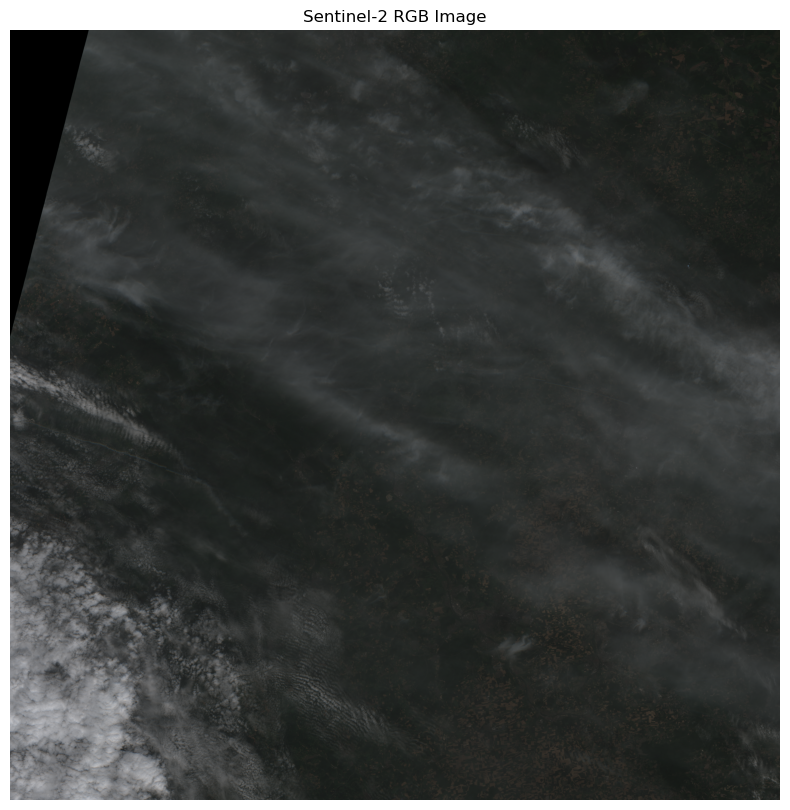

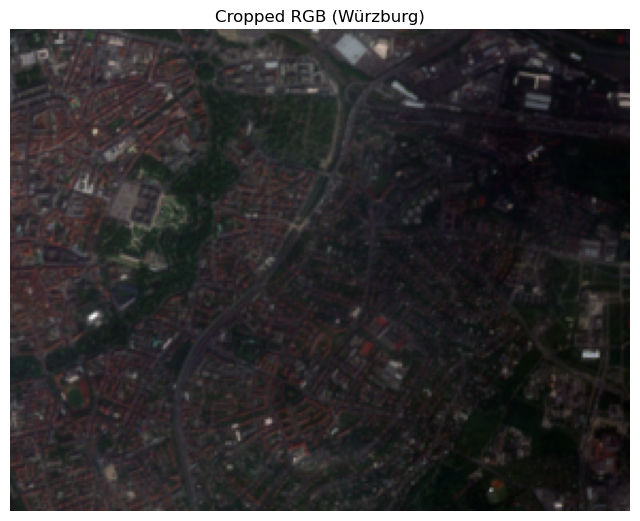

Max Reflectance Values:
Red (B04): 16088
Green (B03): 16096
Blue (B02): 16208


In [11]:
import rasterio
import numpy as np
import matplotlib.pyplot as plt
from rasterio.windows import from_bounds
from rasterio.warp import transform_bounds
import os

# -----------------------------
# 1. Set your SAFE folder path
# -----------------------------
safe_folder = r"C:\Users\febin\Downloads\S2B_20240515\S2B_MSIL2A_20240515T101559_N0510_R065_T32UNA_20240515T162822.SAFE"  # <-- Update this path
granule_folder = os.path.join(safe_folder, "GRANULE")
granule_id = os.listdir(granule_folder)[0]  # usually only 1 granule
img_data_folder = os.path.join(granule_folder, granule_id, "IMG_DATA", "R10m")

# -----------------------------
# 2. Find band file paths
# -----------------------------
band_red = os.path.join(img_data_folder, [f for f in os.listdir(img_data_folder) if "B04" in f][0])
band_green = os.path.join(img_data_folder, [f for f in os.listdir(img_data_folder) if "B03" in f][0])
band_blue = os.path.join(img_data_folder, [f for f in os.listdir(img_data_folder) if "B02" in f][0])

# -----------------------------
# 3. Read bands
# -----------------------------
with rasterio.open(band_red) as r:
    red = r.read(1)
    profile = r.profile  # save metadata if needed
with rasterio.open(band_green) as r:
    green = r.read(1)
with rasterio.open(band_blue) as r:
    blue = r.read(1)

# -----------------------------
# 4. Normalize function for display
# -----------------------------
def normalize(array):
    return (array - array.min()) / (array.max() - array.min())

rgb = np.dstack((normalize(red), normalize(green), normalize(blue)))

# -----------------------------
# 5. Crop to Würzburg coordinates
# -----------------------------
# Würzburg bounding box in WGS84 (lat/lon)
min_lon, min_lat, max_lon, max_lat = 9.93, 49.78, 9.97, 49.80

with rasterio.open(band_red) as src:
    # Transform WGS84 coordinates to image CRS (usually UTM)
    minx, miny, maxx, maxy = transform_bounds('EPSG:4326', src.crs, min_lon, min_lat, max_lon, max_lat)
    window = from_bounds(minx, miny, maxx, maxy, src.transform)
    red_crop = src.read(1, window=window)
    green_crop = rasterio.open(band_green).read(1, window=window)
    blue_crop = rasterio.open(band_blue).read(1, window=window)

rgb_crop = np.dstack((normalize(red_crop), normalize(green_crop), normalize(blue_crop)))

# -----------------------------
# 6. Display full RGB image
# -----------------------------
plt.figure(figsize=(10,10))
plt.imshow(rgb)
plt.title("Sentinel-2 RGB Image")
plt.axis('off')
plt.show()

# -----------------------------
# 7. Display cropped RGB image
# -----------------------------
plt.figure(figsize=(8,8))
plt.imshow(rgb_crop)
plt.title("Cropped RGB (Würzburg)")
plt.axis('off')
plt.show()

# -----------------------------
# 8. Inspect maximum reflectance values
# -----------------------------
print("Max Reflectance Values:")
print("Red (B04):", red.max())
print("Green (B03):", green.max())
print("Blue (B02):", blue.max())
